### Machine Failure Project

In [1]:
from  warnings import filterwarnings
filterwarnings('ignore')

### Read the  train dataset

In [2]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check missing values in df

In [4]:
s=df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

####  Seperate X and Y (Drop statistically insignificant)

In [5]:
X=df.drop(columns=['id','Product ID','Machine failure'])
Y=df[['Machine failure']]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [8]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Cat Con Seperation

In [9]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

#### Create Sklearn pipeline for feature selection (Ordinal)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
# Num_pipe1
num_pipe1=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])

# cat pipe1
cat_pipe1=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                          ('ordinal',OrdinalEncoder())])

# combine both pipeline
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)])

In [14]:
X_pre=pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [15]:
cols=pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [16]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


### Find Mutual Info Scores 

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_pre,Y)
mi

array([0.00590088, 0.00234118, 0.01957746, 0.01993854, 0.00643301,
       0.00773402, 0.02405016, 0.01120423, 0.01890716, 0.00116324,
       0.01142058])

In [18]:
mi=pd.Series(mi)
mi.index=X_pre.columns
mi=mi.sort_values(ascending=False)
mi

num__HDF                        0.024050
num__Torque [Nm]                0.019939
num__Rotational speed [rpm]     0.019577
num__OSF                        0.018907
cat__Type                       0.011421
num__PWF                        0.011204
num__TWF                        0.007734
num__Tool wear [min]            0.006433
num__Air temperature [K]        0.005901
num__Process temperature [K]    0.002341
num__RNF                        0.001163
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

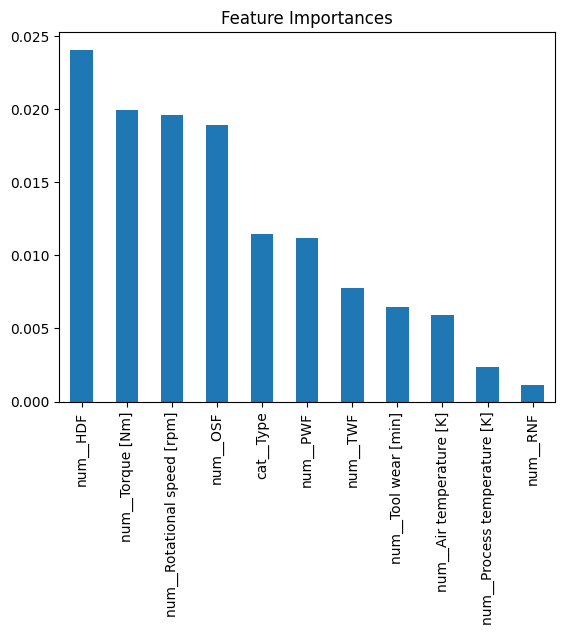

In [19]:
mi.plot(kind='bar',title='Feature Importances')

### Create a final preprocessing pipeline (one hot encoder)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
### Num_pipeline
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

### Cat_pipeline
cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

### Combine both pipeline
pre2 = ColumnTransformer([('num',num_pipe2,con),
                          ('cat',cat_pipe2,cat)])


In [22]:
X_pre2 = pre2.fit_transform(X)
X_pre2


array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [23]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [24]:
X_pre2 = pd.DataFrame(X_pre2,columns=final_cols)
X_pre2.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Seperate Train Test split

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre2, Y, test_size=0.2, random_state=42)


In [26]:
xtrain.shape


(109143, 13)

In [27]:
xtest.shape

(27286, 13)

In [28]:
xtrain.head()


,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


### Algorithm Evaluation


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier


In [30]:
dict = {'Logistic': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Decision Tree': DecisionTreeClassifier()}


In [31]:
dict.items()


dict_items([('Logistic', LogisticRegression()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier()), ('Decision Tree', DecisionTreeClassifier())])

In [32]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
# Initialize blank lists to store results
tr = []
ts = []
tr_cv = []
for name, model in dict.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate train f1 score and test f1 score
    tr_f1 = f1_score(ytrain, ypred_tr)
    ts_f1 = f1_score(ytest, ypred_ts)
    # Append the results in tr and ts list
    tr.append(tr_f1)
    ts.append(ts_f1)
    # Cross validate results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)

### Create eval_dct and dataframe

In [33]:
list(dict.keys())

['Logistic', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

In [34]:
eval_dict = {'Model': list(dict.keys()),
             'tr': tr,
             'ts': ts,
             'tr_cv': tr_cv}

In [35]:
eval_df = pd.DataFrame(eval_dict)
eval_df

,Model,tr,ts,tr_cv
0,Logistic,0.862525,0.864865,0.862230
1,Random Forest,0.994728,0.862644,0.856971
2,Gradient Boosting,0.873239,0.863694,0.858218
3,Decision Tree,0.995007,0.763393,0.743775


In [36]:
eval_df.sort_values(by='ts',ascending=False)

,Model,tr,ts,tr_cv
0,Logistic,0.862525,0.864865,0.862230
2,Gradient Boosting,0.873239,0.863694,0.858218
1,Random Forest,0.994728,0.862644,0.856971
3,Decision Tree,0.995007,0.763393,0.743775


### By using Algorithum evalutaion we conclueded that Random Forest is the best model.
#### Create the Random Forest model using Hyperparamter tuning


In [37]:
params = {'n_estimators' : [10,50,100,200,250],
          'max_depth' : [2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7,8,9,10,11],
          'criterion':['gini','entropy']}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
rl = RandomForestClassifier()
rscv = RandomizedSearchCV(rl,param_distributions= params,cv=5, scoring='f1')

In [39]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11],
                                        'n_estimators': [10, 50, 100, 200,
                                                         250]},
                   scoring='f1')

In [40]:
rscv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_split=3)

In [41]:
rscv.best_score_

0.8622347419983802

In [42]:
best_rf = rscv.best_estimator_
best_rf

RandomForestClassifier(max_depth=6, min_samples_split=3)

### Check accuracy in both training & testing

In [43]:
best_rf.score(xtrain,ytrain)

0.9962159735393017

In [44]:
best_rf.score(xtest,ytest)

0.9961518727552591

### Predict train & test data

In [45]:
ypred_tr =  best_rf.predict(xtrain)
ypred_ts =  best_rf.predict(xtest)

In [46]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [47]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


### Plot Confusion matrix

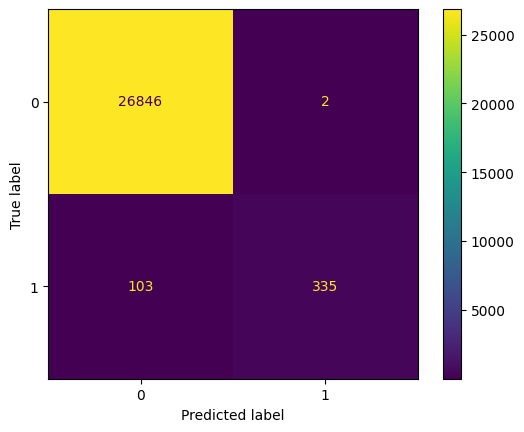

In [48]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rf.classes_)
cfd.plot()

### Print the classification report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.76      0.86       438

    accuracy                           1.00     27286
   macro avg       1.00      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Plotting ROC AUC curve testing

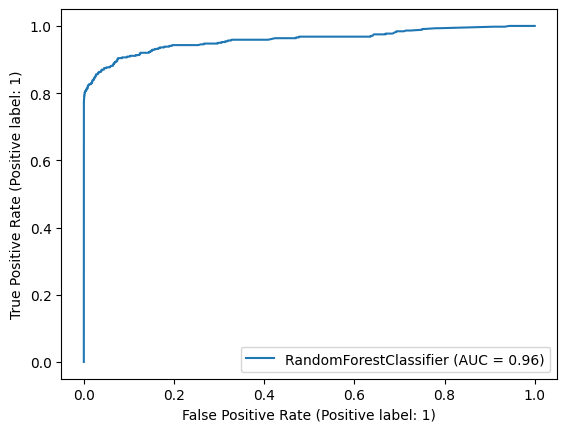

In [50]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_rf,xtest,ytest)

### Plotting ROC AUC curve in training data

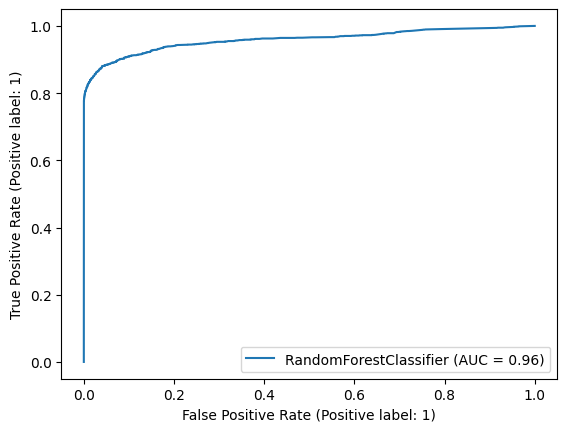

In [51]:
RocCurveDisplay.from_estimator(best_rf,xtrain,ytrain)


### Calulating Area under curve


In [52]:
yprob_ts = best_rf.predict_proba(xtest)[:,1]
yprob_ts

array([0.76755078, 0.00392433, 0.00389569, ..., 0.00383944, 0.00765939,
       0.00383944])

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,yprob_ts)

0.9586787158962888

In [54]:
scores = cross_val_score(best_rf,xtrain,ytrain,scoring='roc_auc')
scores.mean()

0.9549651827974225

### Predicting the test data


In [55]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [56]:
s1 = xnew.isna().sum()
s1[s1>0]

Series([], dtype: int64)

In [57]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [58]:
xnew_pre =  pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Get the preditions

In [59]:
best_rf

RandomForestClassifier(max_depth=6, min_samples_split=3)

In [60]:
best_rf.predict(xtrain)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
best_rf.predict(xtest)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
preds = best_rf.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
probs = best_rf.predict_proba(xnew_pre)[:,1]
probs

array([0.00601351, 0.00490564, 0.00385546, ..., 0.00530267, 0.00336815,
       0.00592604])

## Save the final dataframe

In [64]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [65]:
df_final['MachineFailure_pred']=preds
df_final['MachineFailure_probs']= probs

In [66]:
df_final

,id,MachineFailure_pred,MachineFailure_probs
0,136429,0,0.006014
1,136430,0,0.004906
2,136431,0,0.003855
3,136432,0,0.003418
4,136433,0,0.005397
...,...,...,...
90949,227378,0,0.006042
90950,227379,0,0.003768
90951,227380,0,0.005303
90952,227381,0,0.003368


In [67]:
df_final['MachineFailure_pred'].value_counts()

MachineFailure_pred
0    89858
1     1096
Name: count, dtype: int64

<Axes: xlabel='MachineFailure_pred'>

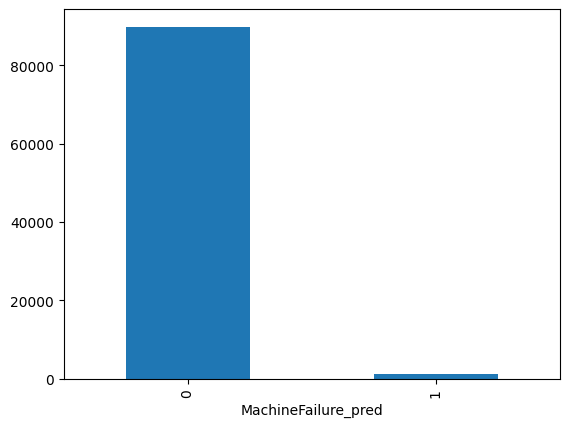

In [68]:
df_final['MachineFailure_pred'].value_counts().plot(kind='bar')


## Save the data in the file

In [69]:
df_final.to_csv('Finalpred.csv',index=False)